# Data Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from karpiu.simulation import make_trend, make_seasonality, make_features, make_regression

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
N_STEPS = 365 * 3
COEFS = [0.03, 0.05, 0.028, 0.01, 0.03]
CHANNELS = ['tv', 'radio', 'social', 'promo', 'search']
LOC = np.array([10000, 5000, 3000, 2000, 850])
SCALE = np.array([5000,3000, 1000, 550, 500])
SEED = 2022
START_DATE = '2019-01-01'

np.random.seed(SEED)

levs = make_trend(n_steps=N_STEPS, rw_loc=0.001, rw_scale=0.01, seed=2022) 
seas = make_seasonality(order=3, scale=0.1, n_steps=N_STEPS, seasonality=365.25, seed=2022)
x = make_features(n_obs=N_STEPS, loc=LOC, scale=SCALE, sparsity=0.25)
x = np.ceil(np.clip(x, a_min=0, a_max=np.inf))
# transformation
tran_x = np.log(1 + x / np.median(x))
reg = make_regression(tran_x, coefs=COEFS, bias=6.4, noise_scale=0.25)

In [4]:
reg.shape

(1095,)

In [5]:
y = levs + seas + reg

In [6]:
data = pd.DataFrame(x, columns=CHANNELS)
# turns to elasticity model with log-log transformation
data['sales'] = np.ceil(np.exp(y))

In [7]:
data['date'] = pd.to_datetime(START_DATE) + pd.to_timedelta(np.arange(data.shape[0]), unit='D')
# re-arrange columns
data = data[['date', 'sales'] + CHANNELS]

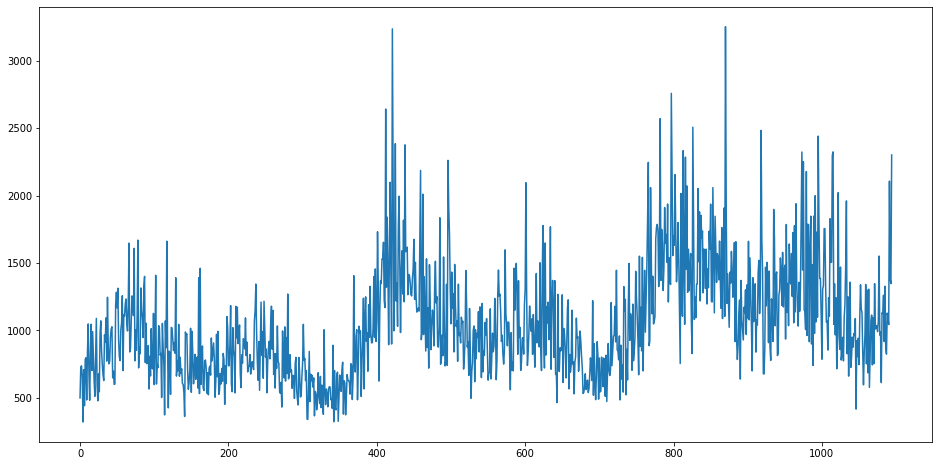

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(data['sales'].values);

In [9]:
data.to_csv('data.csv', index=False)